<a href="https://colab.research.google.com/github/kurelasantosh/P5--Crop--fertilizer--Recommendation-system-using--ML/blob/main/Crop_%26_fertilizer_recommendation_system_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Crop & fertilizer recommendation system using ML





Crop and fertilizer recommendation systems leverage machine learning to optimize agricultural practices. By analyzing various factors like soil properties, climate conditions, and historical data, these systems can:

**Suggest suitable crops**: Predict which crops will thrive best in specific conditions, maximizing yield and minimizing risk.

**Recommend optimal fertilizers**: Determine the right type and amount of fertilizer for each crop, improving nutrient uptake and reducing environmental impact.

**Forecast crop yields**: Estimate potential yields based on current conditions and historical trends, aiding in planning and decision-making.

These systems empower farmers with data-driven insights, leading to increased efficiency, reduced costs, and improved sustainability in agriculture.

#Importing python libraies to implementing the data sets and visuvalizations

numpy, pandas, matplotlib.pyplot, and seaborn are imported to handle data processing, analysis, and visualization.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the Data Sets

The dataset Crop_recommendation.csv is loaded using pd.read_csv().


In [ ]:
crop = pd.read_csv("/content/Crop_recommendation.csv")

#Previewing Data
Display the first and last 5 rows of the dataset, respectively.

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop.tail()


,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


#Dataset Dimensions

provides the number of rows and columns in the dataset.

In [ ]:
crop.shape


(2200, 8)

#Dataset Information
Gives an overview of the dataset, such as data types and non-null counts.


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#Handling Missing Values
crop.isnull() checks for missing values, while crop.isnull().sum() provides the total count of missing values per column.

In [ ]:
crop.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [ ]:
crop.isnull().sum()


,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


#Checking Duplicates:

crop.duplicated() identifies duplicate rows, and crop.duplicated().sum() counts them.


In [ ]:
crop.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2195,False
2196,False
2197,False
2198,False


In [ ]:
crop.duplicated().sum()

0

#Descriptive Statistics:

crop.describe() provides statistical insights, such as mean, standard deviation, min, and max values.

In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#Column Information:

crop.columns lists all available columns in the dataset.

In [ ]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

#Label Distribution:

crop['label'].value_counts() checks the frequency distribution of different crop labels in the dataset.

In [ ]:
crop['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


#crop recommendation data set using the python libraies to implementaion the visuvalizations of data in difference way



By using the seaborn and matplotlib libraies to the visuvalizations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style


In [ ]:
sns.set_style('whitegrid')

# Select numerical features for visualization

# Create histograms for each numerical feature



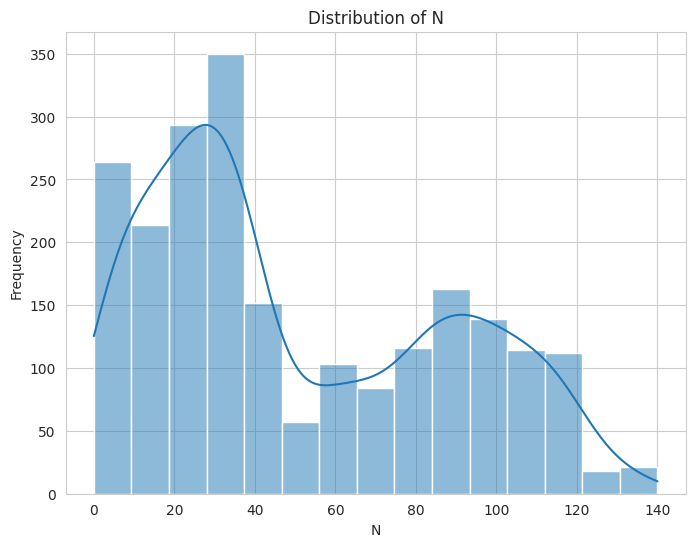

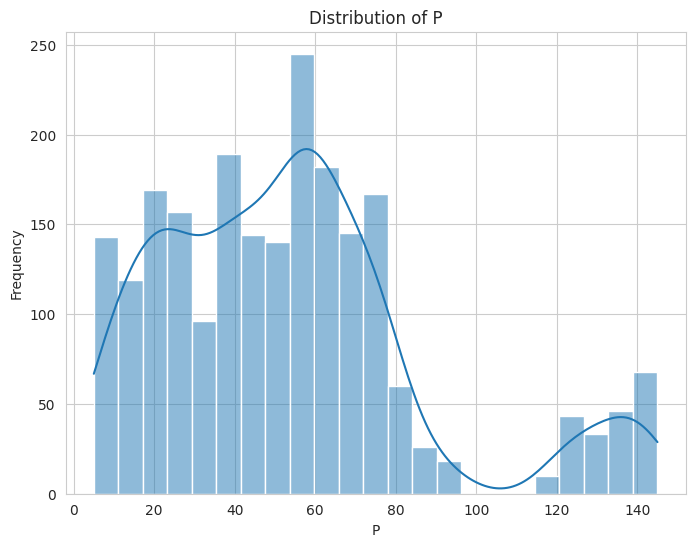

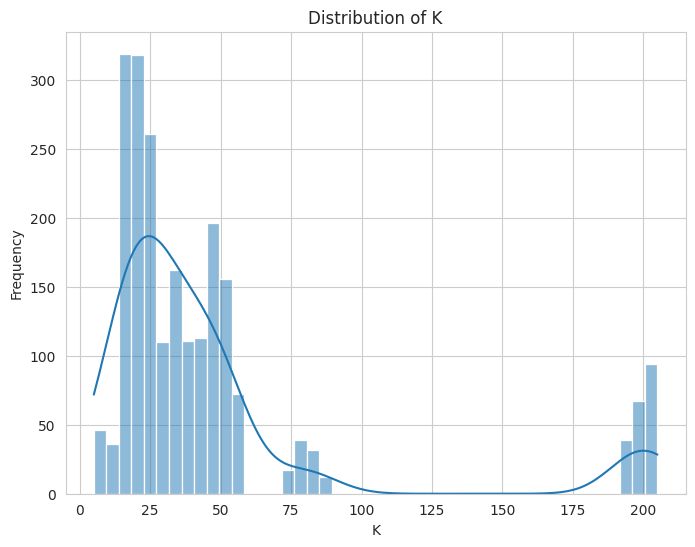

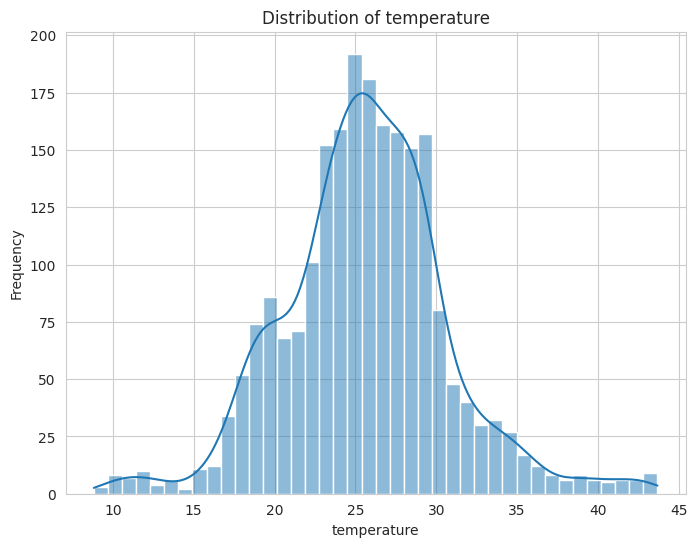

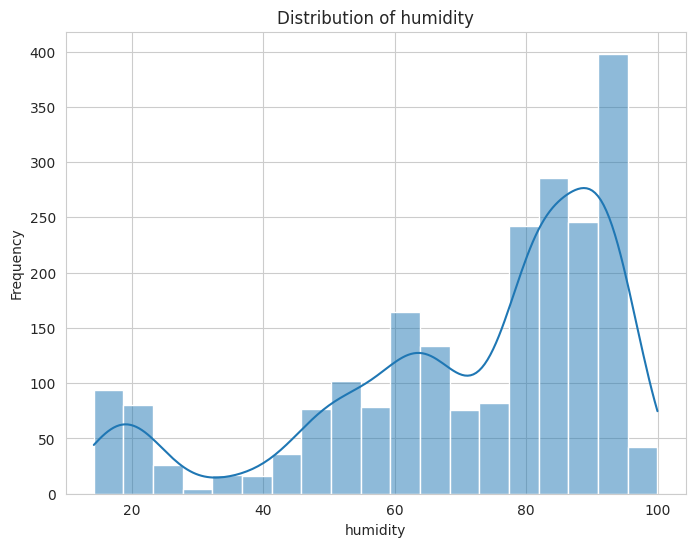

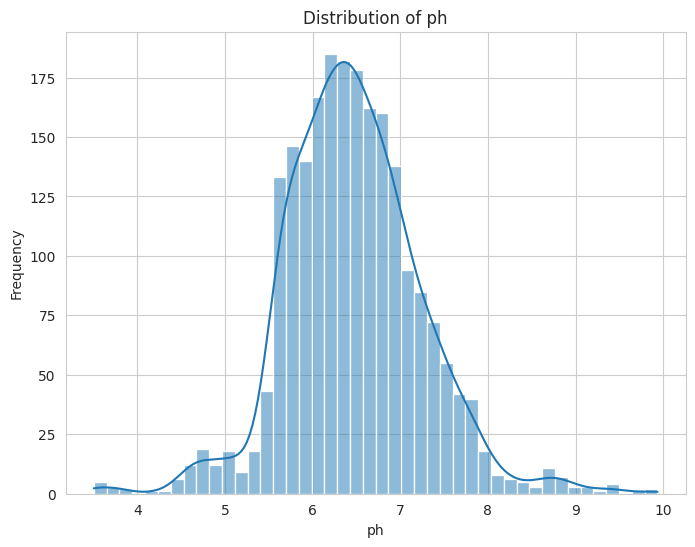

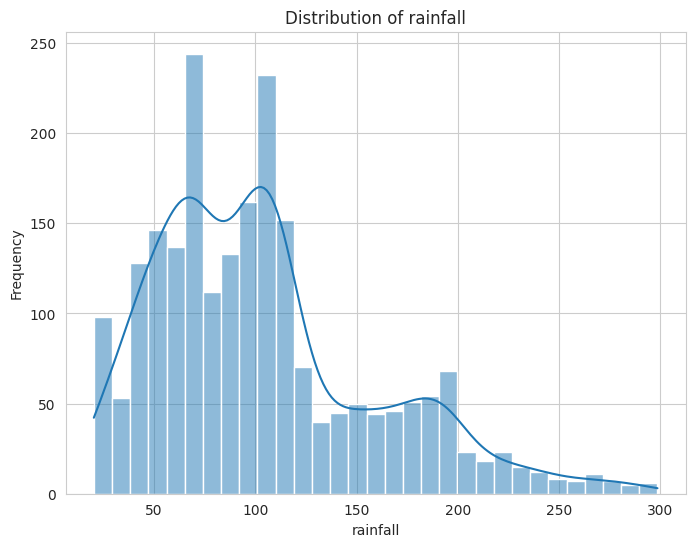

In [ ]:
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for feature in numerical_features:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  sns.histplot(crop[feature], kde=True)  # kde adds a kernel density estimate
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

# Count of different crops


# Comparison of different nutrient levels across crops

<Figure size 1400x600 with 0 Axes>

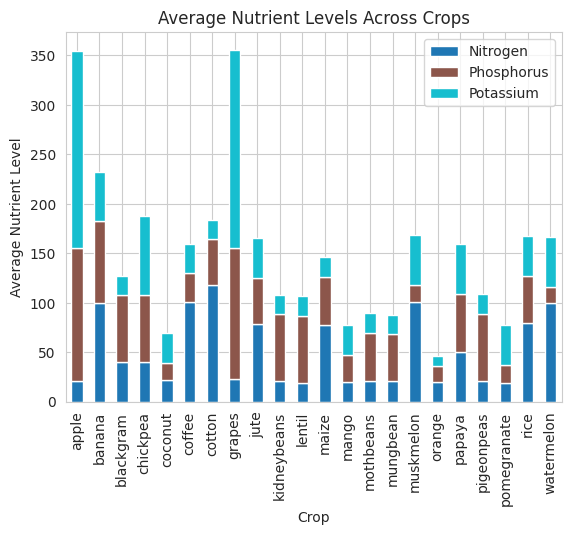

In [ ]:
plt.figure(figsize=(14, 6))
crop.groupby('label')[['N', 'P', 'K']].mean().plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Average Nutrient Levels Across Crops')
plt.xlabel('Crop')
plt.ylabel('Average Nutrient Level')
plt.legend(['Nitrogen', 'Phosphorus', 'Potassium'])
plt.show()

# Boxplot to check for outliers in temperature

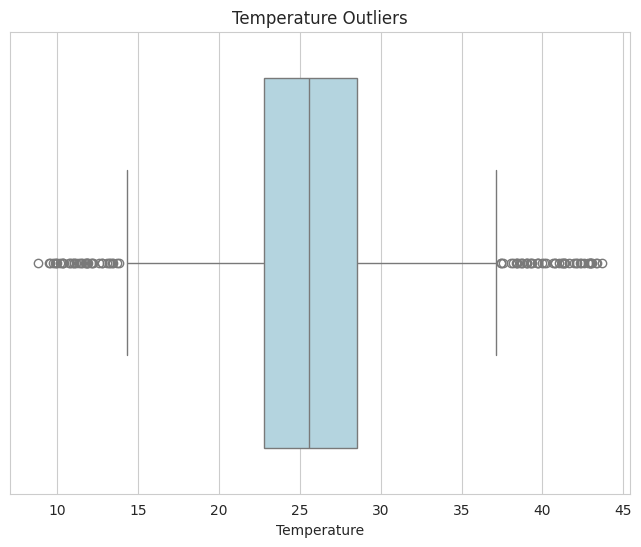

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=crop['temperature'], color='lightblue')
plt.title('Temperature Outliers')
plt.xlabel('Temperature')
plt.show()

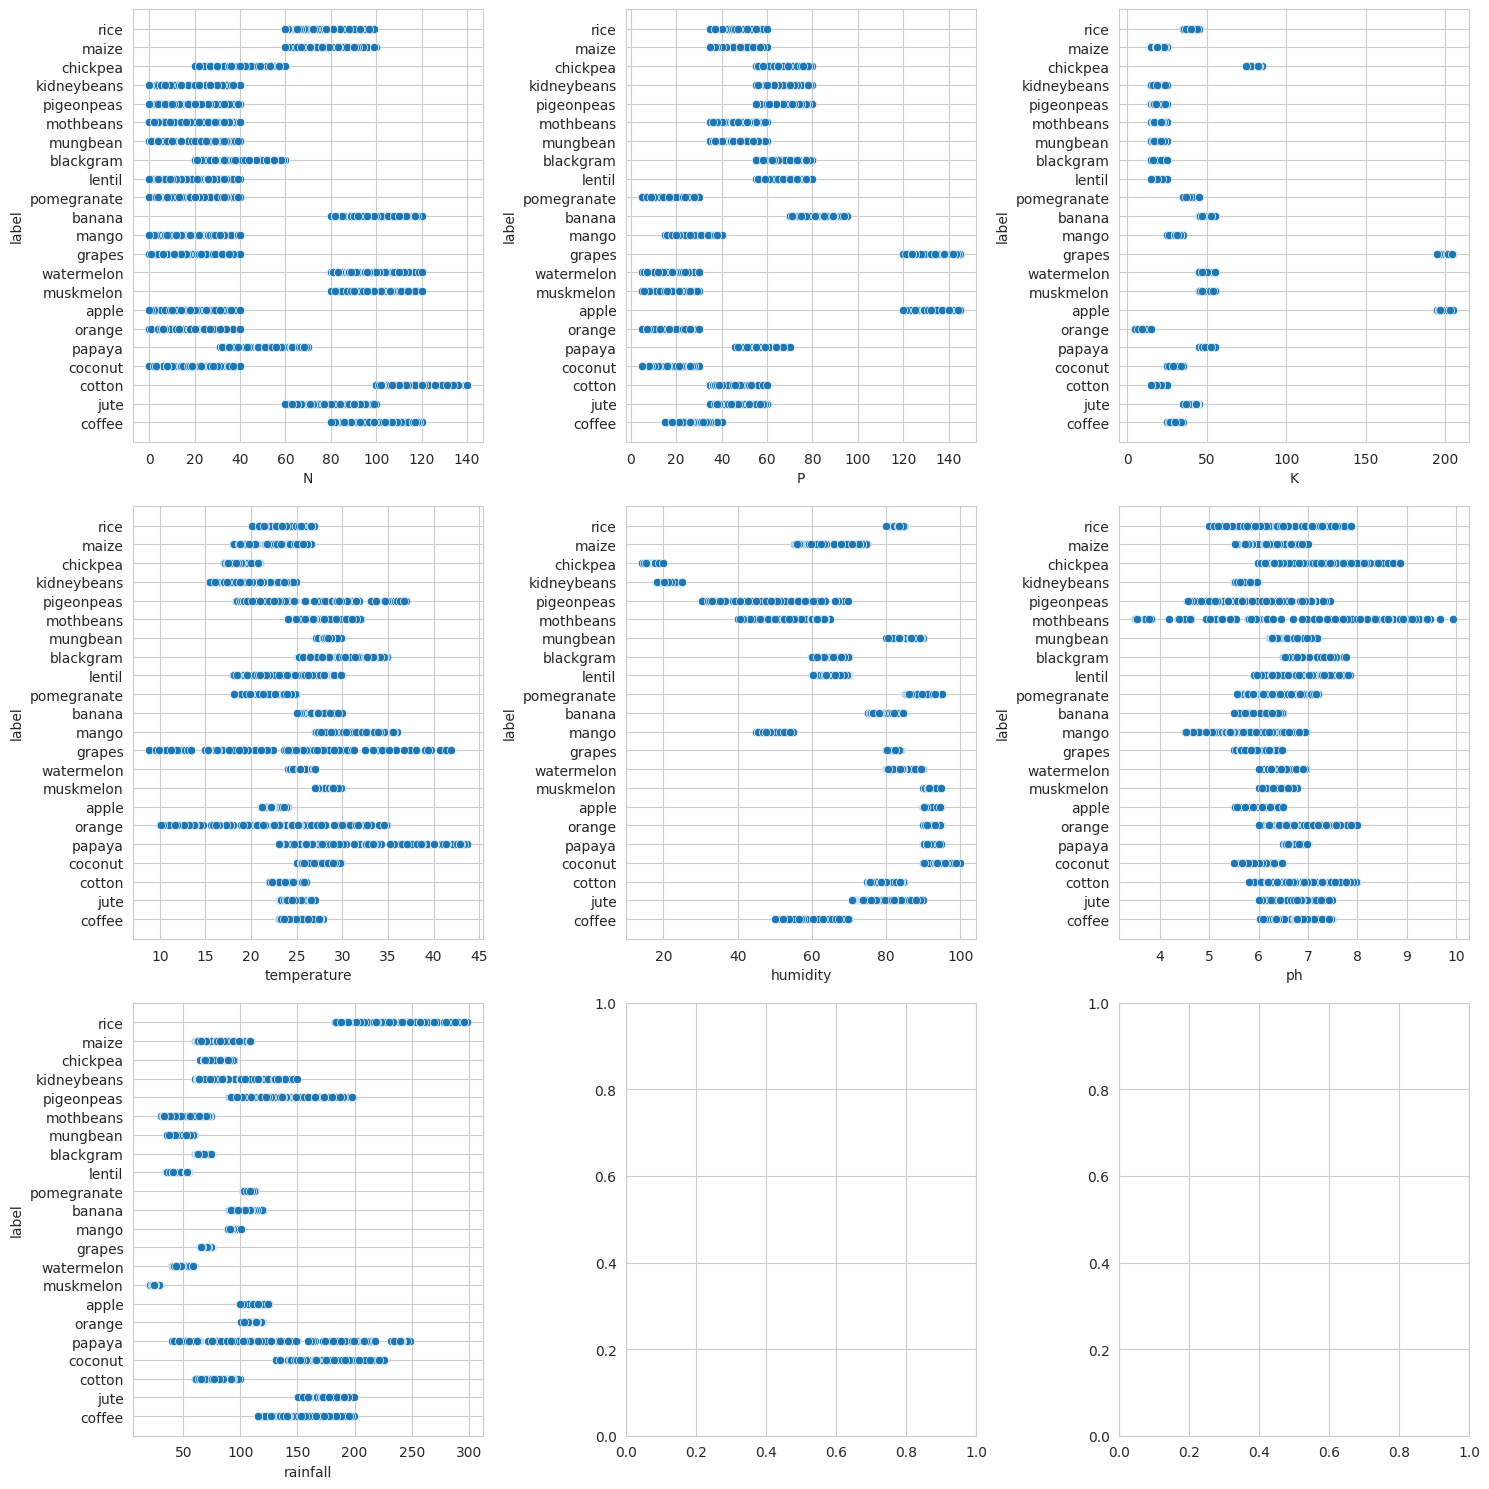

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label', data=crop, ax=subplot)
plt.tight_layout()
plt.show()

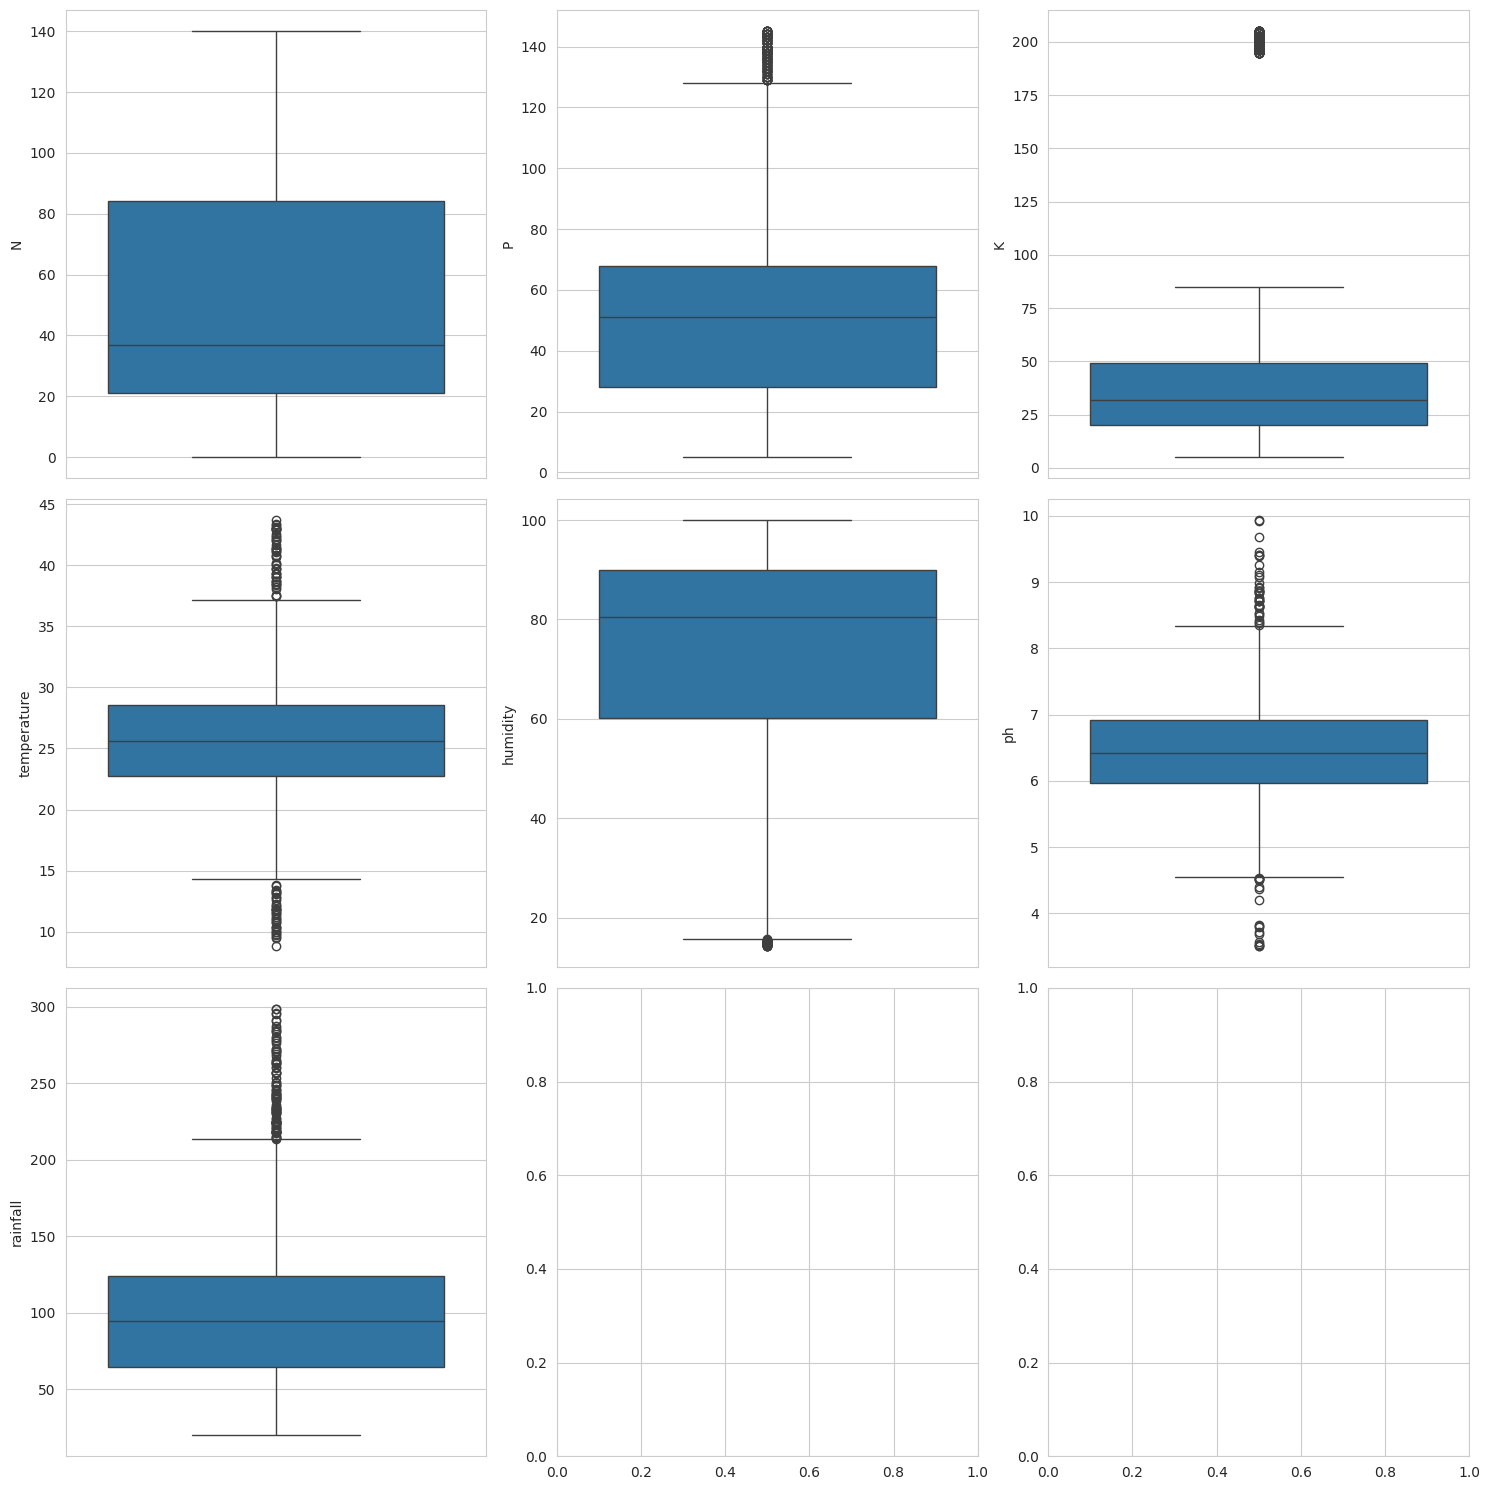

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i], ax=subplot)
plt.tight_layout()
plt.show()

## Fertilizer prediction using the Machine Learning

##To recommend the most suitable fertilizer for a given soil type and crop, maximizing yield and minimizing environmental impact.

Soil data: pH, nitrogen (N), phosphorus (P), potassium (K), organic matter, etc.
Crop data: Type of crop, nutrient requirements, etc.
Fertilizer data: Composition (N, P, K, micronutrients), properties, etc.
Yield data (optional but beneficial): Historical yield data associated with different soil and fertilizer combinations.

##Machine Learning Models:
Regression models (e.g., Linear Regression, Random Forest Regression, Support Vector Regression) to predict crop yield based on soil and fertilizer inputs.
Classification models (e.g., Logistic Regression, Random Forest Classifier, Support Vector Classifier) to categorize soil types or recommend fertilizer types.
##Evaluation Metrics:
Regression: R-squared, Mean Squared Error (MSE), Root Mean Squared Error (RMSE).
Classification: Accuracy, Precision, Recall, F1-score.
##Deployment: Could be a web application, mobile app, or integrated into an existing agricultural platform.

## By importing the libraries of python to analyze and visuvalizations of data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Loading the data set and read the values and analyze the data

In [ ]:
file_path = "/content/Fertilizer Prediction.csv"
df = pd.read_csv(file_path)

## Analyze the dataset info

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


# Set style for sns plots

In [ ]:
sns.set_style("whitegrid")

# Convert categorical columns to numerical representations for visualization

In [ ]:
df_encoded = df.copy()
df_encoded["Soil Type"] = df_encoded["Soil Type"].astype("category").cat.codes
df_encoded["Crop Type"] = df_encoded["Crop Type"].astype("category").cat.codes
df_encoded["Fertilizer Name"] = df_encoded["Fertilizer Name"].astype("category").cat.codes




# Pairplot again with encoded data


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

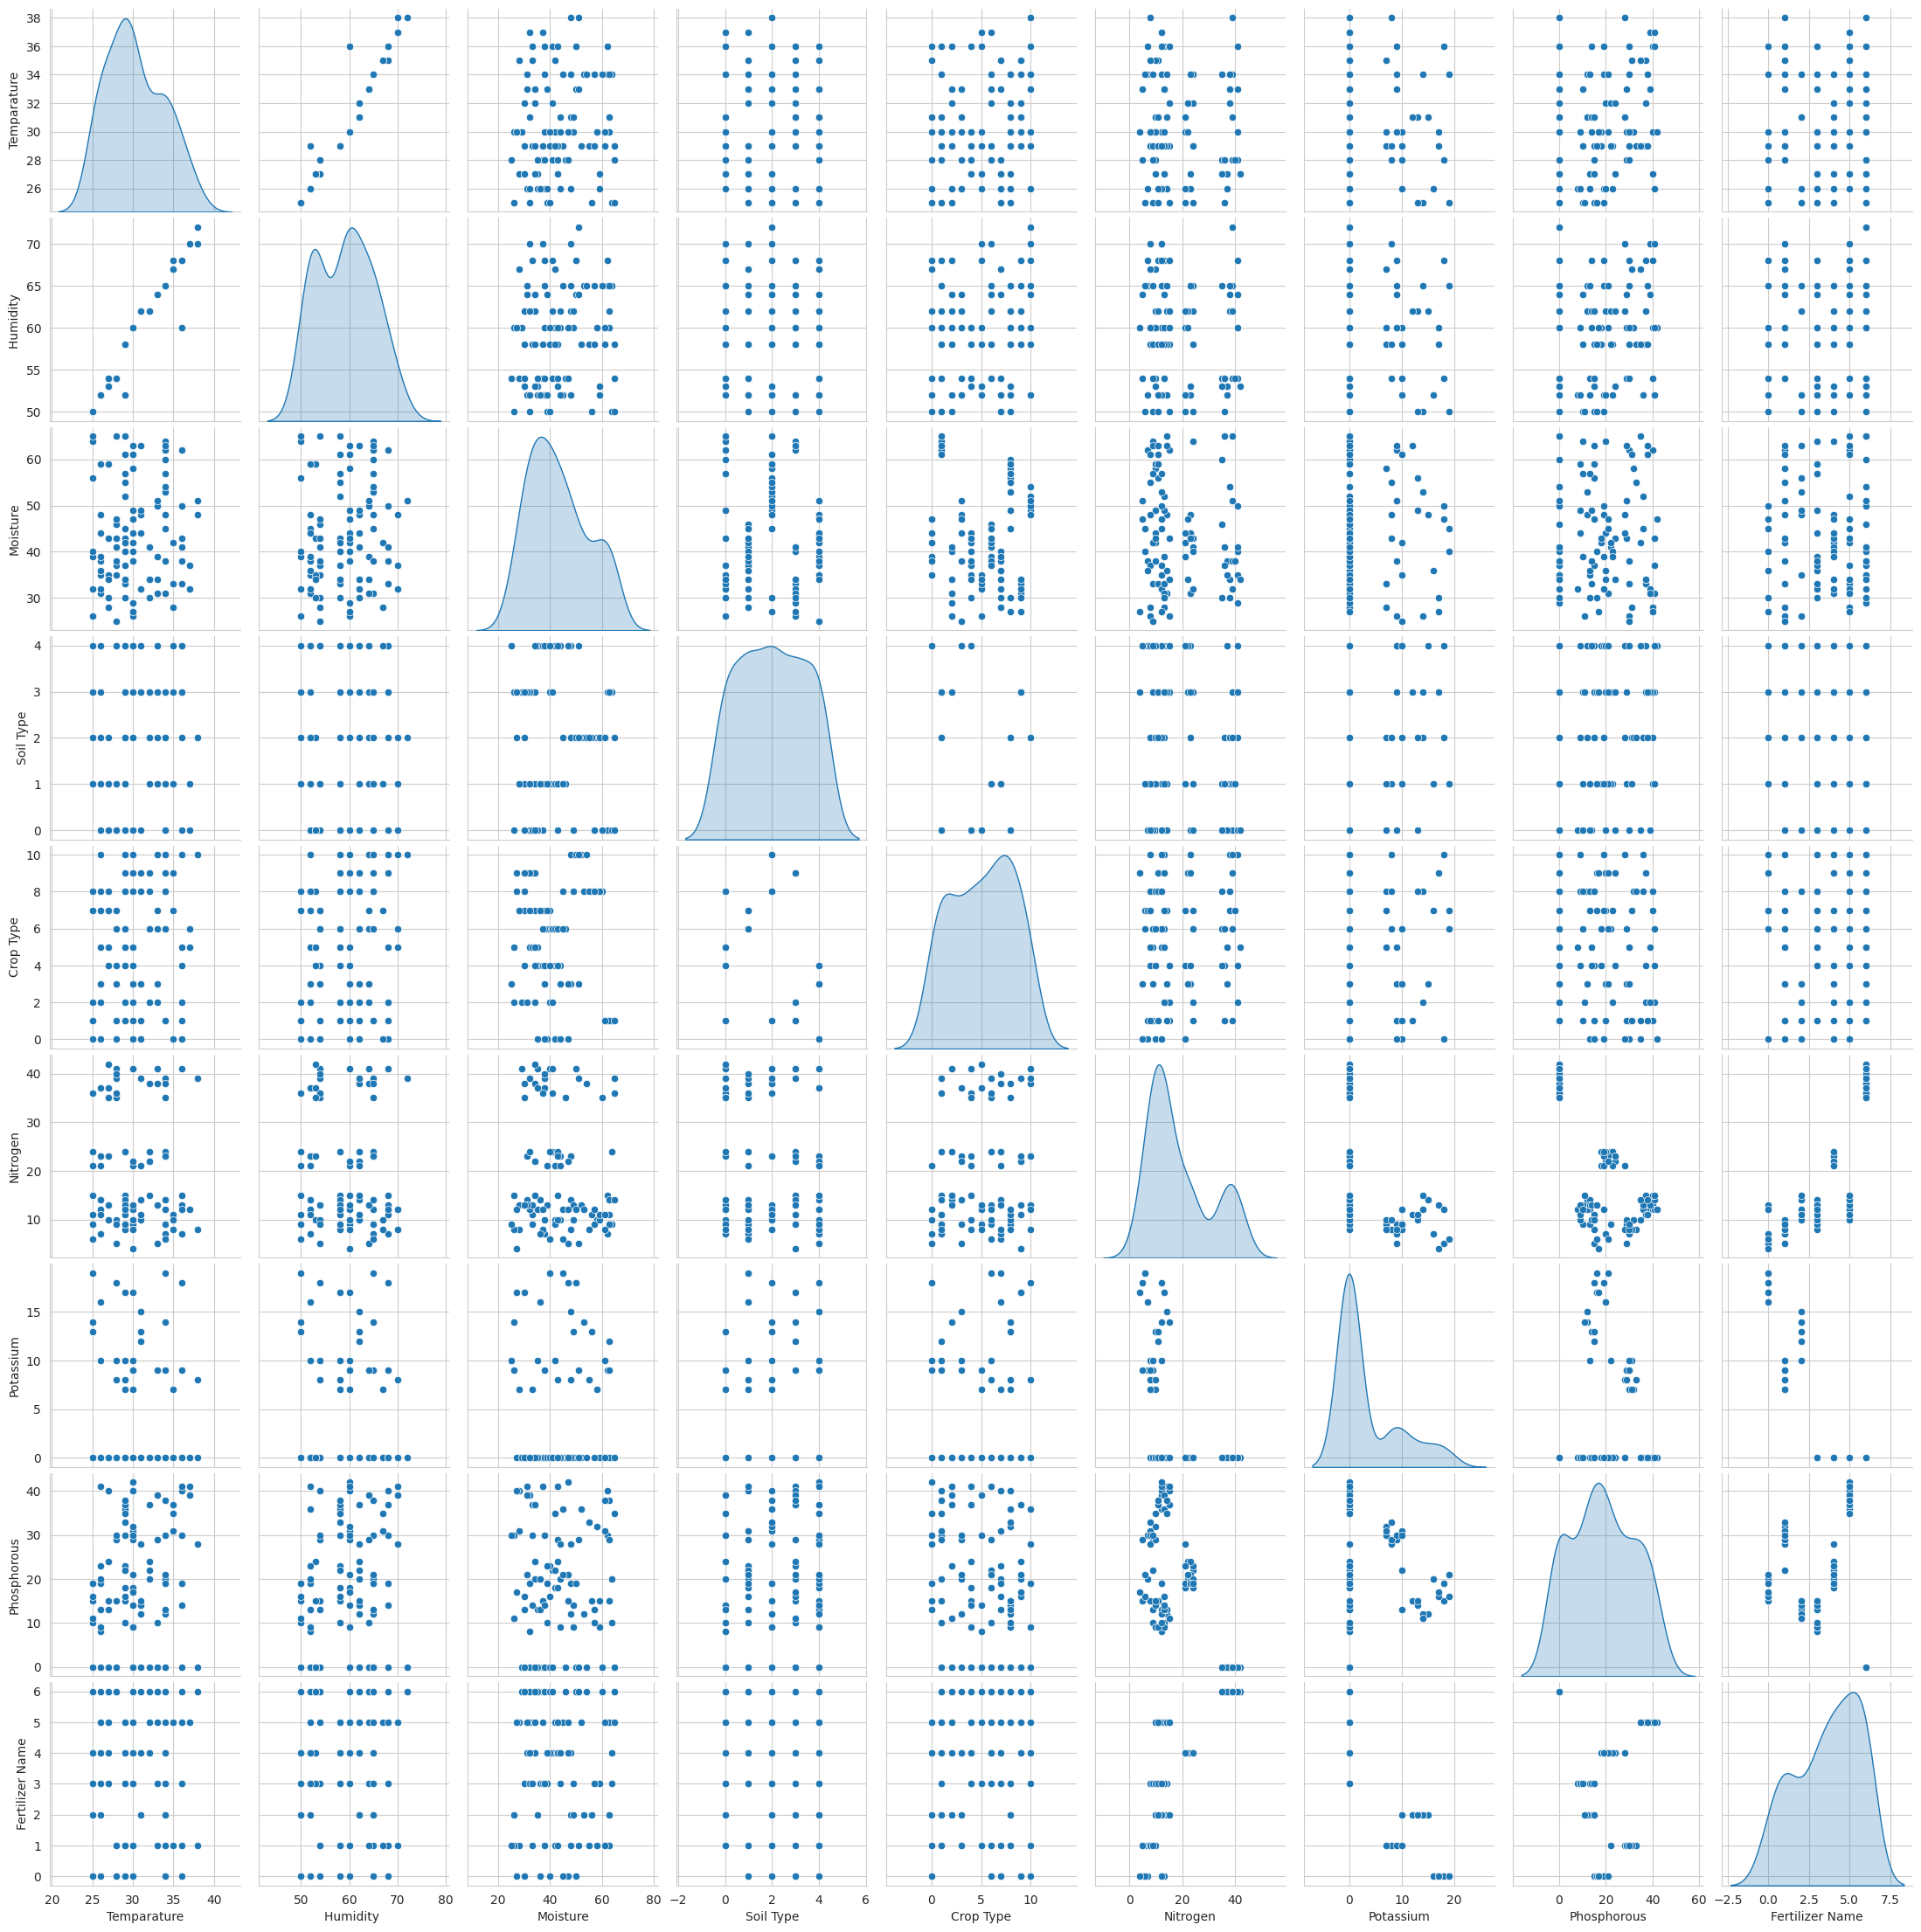

In [ ]:
sns.pairplot(df_encoded, diag_kind="kde", palette="tab10")
plt.show()

# Check for missing values and data types


In [ ]:
df.isnull().sum(), df.dtypes

(Temparature        0
 Humidity           0
 Moisture           0
 Soil Type          0
 Crop Type          0
 Nitrogen           0
 Potassium          0
 Phosphorous        0
 Fertilizer Name    0
 dtype: int64,
 Temparature         int64
 Humidity            int64
 Moisture            int64
 Soil Type          object
 Crop Type          object
 Nitrogen            int64
 Potassium           int64
 Phosphorous         int64
 Fertilizer Name    object
 dtype: object)

# Plot distribution of Temperature, Humidity, and Moisture


Text(0.5, 1.0, 'Moisture Distribution')

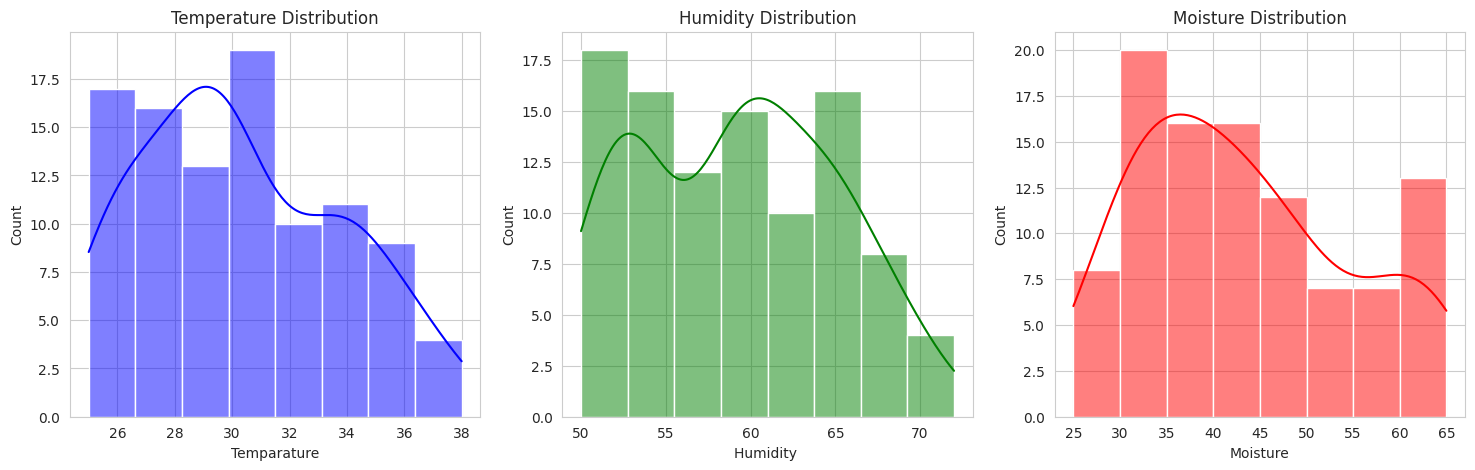

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["Temparature"], kde=True, ax=axes[0], color="blue")
axes[0].set_title("Temperature Distribution")


sns.histplot(df["Humidity "], kde=True, ax=axes[1], color="green")
axes[1].set_title("Humidity Distribution")

sns.histplot(df["Moisture"], kde=True, ax=axes[2], color="red")
axes[2].set_title("Moisture Distribution")

# Trim any extra spaces in column names

# Verify the cleaned column names


In [ ]:

df.columns = df.columns.str.strip()
df.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [ ]:
num_cols = crop.select_dtypes(include=[np.number])
num_cols

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
corr = num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


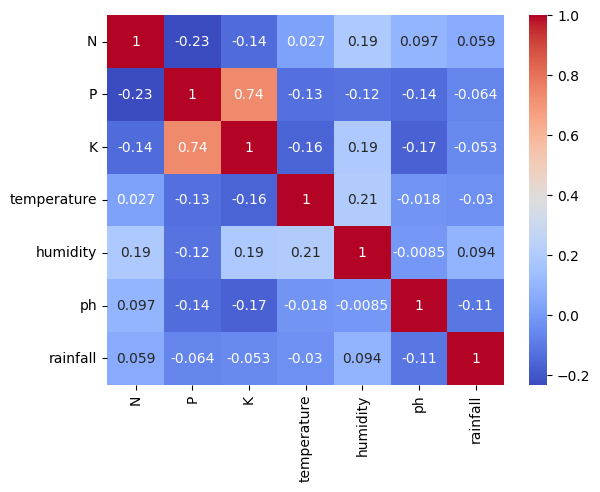

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
crop_dict = {
    'rice' : 1,
    'maize' : 2,
    'chickpea' : 3,
    'kidneybeans' : 4,
    'pigeonpeas' : 5,
    'mothbeans' : 6,
    'mungbean' : 7,
    'blackgram' : 8,
    'lentil' : 9,
    'pomegranate' : 10,
    'banana' : 11,
    'mango' : 12,
    'grapes' : 13,
    'watermelon' : 14,
    'muskmelon' : 15,
    'apple' : 16,
    'orange' : 17,
    'papaya' : 18,
    'coconut' : 19,
    'cotton' : 20,
    'jute' : 21,
    'coffee' : 22
}

In [ ]:
crop['crop_no'] = crop['label'].map(crop_dict)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [ ]:
crop.tail()


,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,22


In [ ]:
crop.drop('label', axis=1, inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,22


In [ ]:
#train test split
x = crop.drop('crop_no', axis=1, errors='ignore') # Ignore error if 'crop_no' is not found
y = crop['crop_no']
print(x.shape)
print(y.shape)

(2200, 7)
(2200,)


In [ ]:
y.shape

(2200,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(1760, 7)

In [ ]:
x_test.shape

(440, 7)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:

crop['crop_no'].nunique()

22

In [ ]:
crop_dict = {
    'rice': 0,
    'maize': 1,
    'chickpea': 2,
    'kidneybeans': 3,
    'mungbean': 4,
    'blackgram': 5,
    'lentil': 6,
    'pomegranate': 7,
    'banana': 8,
    'mango': 9,
    'grapes': 10,
    'watermelon': 11,
    'muskmelon': 12,
    'apple': 13,
    'orange': 14,
    'papaya': 15,
    'coconut': 16,
    'cotton': 17,
    'jute': 18,
    'coffee': 19
}

In [ ]:

crop = pd.read_csv("/content/Crop_recommendation.csv")


crop['crop_no'] = crop['label'].map(crop_dict)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0.0


In [ ]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,19.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,19.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,19.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,19.0
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,19.0


In [ ]:
crop.drop('label', axis=1, inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,19.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,19.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,19.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,19.0
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,19.0


In [ ]:
y_pred = dtc.predict(x_test_scaled)
acs = accuracy_score(y_test, y_pred)
print(acs)

0.9818181818181818


In [ ]:
import numpy as np
def crop_recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    transformed_features = scaler.transform(features)
    prediction = dtc.predict(transformed_features).reshape(1, -1)
    crop_dict = {
    'rice': 0,
    'maize': 1,
    'chickpea': 2,
    'kidneybeans': 3,
    'mungbean': 4,
    'blackgram': 5,
    'lentil': 6,
    'pomegranate': 7,
    'banana': 8,
    'mango': 9,
    'grapes': 10,
    'watermelon': 11,
    'muskmelon': 12,
    'apple': 13,
    'orange': 14,
    'papaya': 15,
    'coconut': 16,
    'cotton': 17,
    'jute': 18,
    'coffee': 19
}

    crop = [crop_dict[i] for i in prediction[0]]
    return f"{crop} is a best crop to grow in the farm"